In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


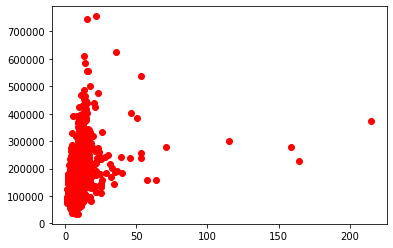

In [4]:
plt.plot(data.LotArea/1000,data.SalePrice,'ro')

In [5]:
X = np.random.rand(100)

In [6]:
Y = X*X+np.random.rand(100)/5-0.5

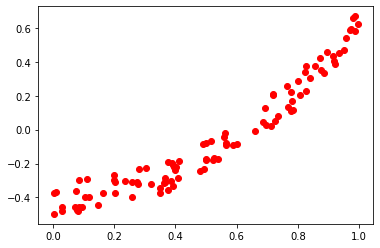

In [7]:
plt.plot(X,Y,'ro')

In [8]:
data = pd.DataFrame({'x1':X})

In [9]:
data['x2'] = 1

In [10]:
data

,x1,x2
0,0.876568,1
1,0.094741,1
2,0.084827,1
3,0.562256,1
4,0.996959,1
...,...,...
95,0.841047,1
96,0.697421,1
97,0.564680,1
98,0.566753,1


In [11]:
A = [0.0,0.0]

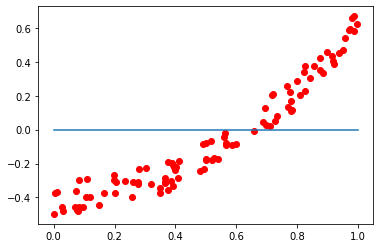

In [12]:
plt.plot(X,Y,'ro')

t = np.linspace(0,1,10)

plt.plot(t,t*A[0]+A[1])

In [13]:
m = data.shape[0]
n = data.shape[1]

1.868962106785667


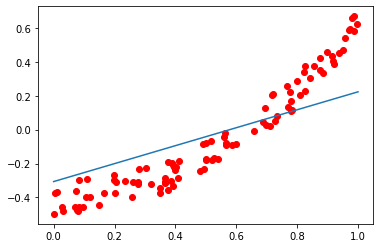

In [14]:
A = np.zeros([n])

for _ in range(10):
    J = 0
    h = np.matmul(data.values,A)
    J = np.sum(0.5*(h - Y)**2)
        
    #print(J) 
    
    grad = np.zeros([n])
    for j in range(n):
        grad[j] = np.sum((h - Y)*data.iloc[:,j])
    A = A - 0.01*grad
    
plt.plot(X,Y,'ro')
plt.plot(t,t*A[0]+A[1])

print(J)

In [15]:
np.zeros([1,n])

array([[0., 0.]])

In [16]:
h = np.matmul(data.values,A)
    
J = np.sum(0.5*(h - Y)**2)

In [17]:
J

1.6872443858078723

# Classification

In [18]:
r = np.random.rand(100) * 2
a = np.random.rand(100) * 360

In [19]:
x = r*np.sin(a)
y = r*np.cos(a)

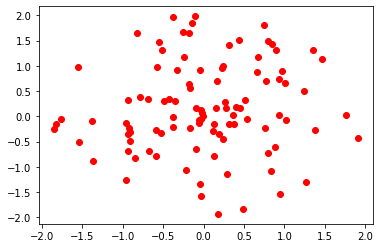

In [20]:
plt.plot(x,y,'ro')

In [21]:
r = np.random.rand(100) * 2
a = np.random.rand(100) * 360

In [30]:
x2 = r*np.sin(a) + 4
y2 = r*np.cos(a) + 3

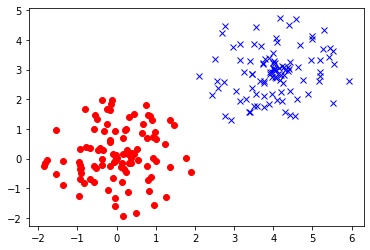

In [31]:
plt.plot(x,y,'ro')
plt.plot(x2,y2,'bx')

In [32]:
X = pd.DataFrame({'x':x,'y':y,'z':1,'target':0})

In [33]:
X = pd.concat([X,pd.DataFrame({'x':x2,'y':y2,'z':1,'target':1})])

In [34]:
X

,x,y,z,target
0,-0.050383,-0.071813,1,0
1,1.356550,1.312839,1,0
2,-1.823126,-0.159166,1,0
3,-0.045219,-1.336059,1,0
4,-0.139703,1.855007,1,0
...,...,...,...,...
95,3.150443,3.318638,1,1
96,4.429751,1.481817,1,1
97,4.010778,2.989098,1,1
98,4.044596,2.757662,1,1


In [35]:
n = 3

In [77]:
A_0 = np.zeros([n])

for _ in range(100):
    J = 0
    h = 1/(1+np.exp(-np.matmul(X[['x','y','z']].values,A_0)))
    J = -np.sum(X.target*np.log(h)+(1-X.target)*np.log(1-h))
        
    print(J) 
    
    grad = np.zeros([n])
    for j in range(n):
        grad[j] = np.sum((X.target - h)*X.iloc[:,j])
    A_0 = A_0 + 0.1*grad
    
#plt.plot(X,Y,'ro')
#plt.plot(t,t*A[0]+A[1])

#print(J)

138.62943611198904
inf
522.1509386400036
238.60476250104762
98.80259474894588
31.046818089498686
11.398812671427267
5.097530873261368
2.3210707173617284
1.3247171466053835
0.9023692555196876
0.6795694207852542
0.5439113782752618
0.453246651394019
0.38864987308258053
0.340451397233332
0.3032202108680184
0.27367890793748256
0.24973539129477093
0.22999252320432934
0.21348203274785726
0.19951173642422354
0.18757360773301296
0.1772862286040725
0.1683575249057666
0.1605599209442581
0.15371334627935437
0.1476733494271182
0.14232261663708437
0.1375648118320036
0.13332003042912932
0.1295213953796976
0.12611247465660047
0.12304529812604392
0.120278817565817
0.11777769827465442
0.11551136154220207
0.11345321883440349
0.1115800538739889
0.10987151981512305
0.10830972672835083
0.10687890050811222
0.1055650986945944
0.10435597198439571
0.10324056268532203
0.10220913325982281
0.1012530195496251
0.10036450439116933
0.09953670819767442
0.09876349375883908
0.09803938303791909
0.09735948416177195
0.09671

/Users/petertantsov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  



0.08377766720939392
0.08355320660061874
0.08333146782730806
0.08311237508595604
0.08289585734385455
0.08268184788422894
0.08247028390039562
0.08226110613352434
0.08205425854910381
0.08184968804786256


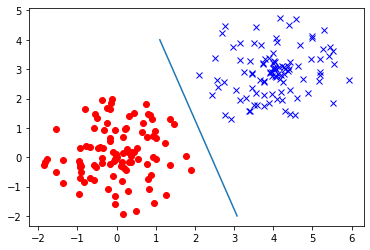

In [43]:
t_y = np.linspace(-2,4,10)
t_x = (-A[1]*t_y-A[2])/A[0]

plt.plot(x,y,'ro')
plt.plot(x2,y2,'bx')
plt.plot(t_x,t_y)

# SVM

In [73]:
A = np.zeros([n])
#A = np.array([3.1,0.2,0.3])

for _ in range(100):
    J = 0
    #h = 1/(1+np.exp(-np.matmul(X[['x','y','z']].values,A)))
    h = np.matmul(X[['x','y','z']].values,A)
    #J = -np.sum(X.target*np.log(h)+(1-X.target)*np.log(1-h))
    J = np.sum(X.target * (-h+1) * (h<=1) + (1-X.target) * (h+1) * (h>=-1))
        
    print(J) 
    
    grad = np.zeros([n])
    for j in range(n):
        #grad[j] = np.sum((X.target - h)*X.iloc[:,j])
        grad[j] = np.sum((X.target * (-1) * (h<=1) + (1-X.target) * (1) * (h>=-1))*X.iloc[:,j])
    A = A - 0.01*grad
    
#plt.plot(X,Y,'ro')
#plt.plot(t,t*A[0]+A[1])

#print(J)

200.0
255.8086431557761
196.31099438687176
144.07149028524688
102.00632142411399
69.26460700885693
44.5564899468727
28.977790945147945
18.456136649090784
9.990031725322973
5.050877794008047
2.735476299131291
2.1121875523110685
1.4888988054908459
0.8706265062352041
0.582154977586661
0.3267604868991447
0.2246297549382783
0.20824533515472332
0.2052181038255365
0.19072957133852508
0.17434515155497143
0.17143940229844823
0.15682938773877186
0.14044496795521955
0.1376607007713604
0.12292920413901998
0.10654478435546588
0.103881999244273
0.09111372615714242
0.19296496645085082
0.19998868515232493
0.07903319081469551
0.07885048264843642
0.17168868361562772
0.18772544164361848
0.054184382385117136
0.06658723913973041
0.15041240078040463
0.17546219813491204
0.029335573955538763
0.054323995631023525
0.12913611794518243
0.16319895462620604
0.014869970746089312
0.07224359120577972
0.1828122294030976
0.02364949804215799
0.029758044770471948
0.061674026899208645
0.05096730837055752
0.1705489858943902

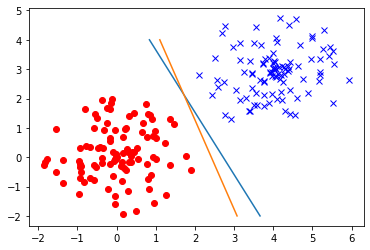

In [78]:
t_y = np.linspace(-2,4,10)
t_x = (-A[1]*t_y-A[2])/A[0]
t_x_0 = (-A_0[1]*t_y-A_0[2])/A_0[0]


plt.plot(x,y,'ro')
plt.plot(x2,y2,'bx')
plt.plot(t_x,t_y)
plt.plot(t_x_0,t_y)